# Análisis final (bnk_add_cust_det_merge)

### Importamos la librerías que vamos a necesitar

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import locale
locale.setlocale(locale.LC_TIME, "Spanish_Spain") # he necesitado buscar como hacer que python me reconozca algunas palabras (en este caso los meses de la columna 'date') en español, para poder trabajar con esos datos

'Spanish_Spain.1252'

### Añadimos algunos settings para mejorar la visualización de los datos

In [2]:
pd.set_option('display.max_columns', None) # nos enseña todas las columnas
sns.set(style="whitegrid") # ayuda a la hora de insertar gráficos

### Importamos nuestros archivos csv y realizamos una copia para poder recuperar datos más adelante si fuera necesario

In [4]:
bnk_add = pd.read_csv("bnk_add_clean.csv")
bnk_add_copy = bnk_add.copy()

cust_det = pd.read_csv("cust_det_clean.csv")
cust_det_copy = cust_det.copy()

### Verificamos que las claves para el merge sean comunes en ambos DataFrames

In [ ]:
cust_det = cust_det.rename(columns={"ID": "id_"}) # usaremos el campo id para identificar a cada cliente al juntar las dos tablas

### Creación de un único DataFrame formado por los datos de los dos archivos csv a través de un merge

In [7]:
bnk_add_cust_det_merge = pd.merge(bnk_add, cust_det, on="id_", how="inner")

Para este análisis me voy a quedar con los clientes de los que tenemos información (datos) demográfica (clientes con datos en ambos archivos)

### Resumen de la forma, tipos de datos y muestra del nuevo DataFrame

In [105]:
print("Nº de filas y de columnas: ", bnk_add_cust_det_merge.shape)

print("\nTipos de datos: ")
print(bnk_add_cust_det_merge.dtypes)

print("\nMuestra de las primeras 5 filas:")
bnk_add_cust_det_merge.head()

Nº de filas y de columnas:  (43000, 34)

Tipos de datos: 
age                           float64
job                            object
marital                        object
education                      object
default                       float64
housing                       float64
loan                          float64
contact                        object
duration                        int64
campaign                        int64
pdays                           int64
previous                        int64
poutcome                       object
emp.var.rate                  float64
cons.price.idx                float64
cons.conf.idx                 float64
euribor3m                     float64
nr.employed                   float64
y                              object
latitude                      float64
longitude                     float64
id_                            object
ratio_campaign_prev           float64
duration_warning                int64
credit_warning                

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,latitude,longitude,id_,ratio_campaign_prev,duration_warning,credit_warning,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,Año,TotalKids,recent_customer,TotalHijos
0,38.0,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,1.0,0,0.0,161770,1,0,2012-04-04,29,2012,1,0,1
1,57.0,services,MARRIED,high.school,0.0,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,1.0,0,0.0,85477,1,1,2012-12-30,7,2012,2,0,2
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,1.0,0,1.0,147233,1,1,2012-02-02,5,2012,2,0,2
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,1.0,0,0.0,121393,1,2,2012-12-21,29,2012,3,0,3
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,1.0,0,1.0,63164,1,2,2012-06-20,20,2012,3,0,3


### Comprobación de datos nulos y filas duplicadas

In [106]:
print("Valores nulos por columna:", bnk_add_cust_det_merge.isna().sum())

print("\nNº de filas duplicadas:", bnk_add_cust_det_merge.duplicated().sum())

Valores nulos por columna: age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
nr.employed            0
y                      0
latitude               0
longitude              0
id_                    0
ratio_campaign_prev    0
duration_warning       0
credit_warning         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
NumWebVisitsMonth      0
Año                    0
TotalKids              0
recent_customer        0
TotalHijos             0
dtype: int64

Nº de filas duplicadas: 0


### Eliminación de la columna date

In [11]:
bnk_add_cust_det_merge = bnk_add_cust_det_merge.drop(columns=["date"]) # considero que al tener la columna 'Dt_Customer', y que la columna 'date' contiene algún valor nulo, lo más limpio y eficaz es borrar la columna 'date' para evitar información duplicada al igual que esos valores nulos ya comentados

### Comprobación de la eliminación de la columna 'date'

In [12]:
bnk_add_cust_det_merge.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,latitude,longitude,id_,ratio_campaign_prev,duration_warning,credit_warning,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,Año,TotalKids,recent_customer,TotalHijos
0,38.0,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,1.0,0,0.0,161770,1,0,2012-04-04,29,2012,1,0,1
1,57.0,services,MARRIED,high.school,0.0,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,1.0,0,0.0,85477,1,1,2012-12-30,7,2012,2,0,2
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,1.0,0,1.0,147233,1,1,2012-02-02,5,2012,2,0,2
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,1.0,0,0.0,121393,1,2,2012-12-21,29,2012,3,0,3
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,5191.0,no,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,1.0,0,1.0,63164,1,2,2012-06-20,20,2012,3,0,3


In [ ]:
bnk_add_cust_det_merge["Dt_Customer"] = pd.to_datetime(bnk_add_cust_det_merge["Dt_Customer"]) # es necesario cambiar el tipo de dato de la columna 'Dt_Customer' de object a datetime para poder extraer el mes, año o día de esta columna, ya que a continuación lo necesitaremos al crear filtrados, agrupamientos o incluso gráficas

In [23]:
print(bnk_add_cust_det_merge.dtypes["Dt_Customer"])

datetime64[ns]


### Reutilización de código para la creación de filtrados y agrupamientos 

En este apartado he querido recuperar las líneas de codigo que hemos usado en los otros dos archivos por si hacen falta al estudiar algún aspecto en concreto

In [24]:
clientes_altos_ingresos = bnk_add_cust_det_merge[bnk_add_cust_det_merge["Income"] > 150000]  # clientes con ingresos altos

clientes_recientes = bnk_add_cust_det_merge[bnk_add_cust_det_merge["Dt_Customer"].dt.year > 2015] # clientes que entraron después de 2015

clientes_llamada_larga = bnk_add_cust_det_merge[bnk_add_cust_det_merge["duration"] > 500] # clientes cuya última llamada sea de más de 500 segundos, lo que podeos considerar como una llamada larga

clientes_jovenes = bnk_add_cust_det_merge[bnk_add_cust_det_merge["age"] < 30] # clientes menores de 30 años (clientes jóvenes)

In [25]:
ingreso_promedio_año = bnk_add_cust_det_merge.groupby("Año")["Income"].mean().sort_values(ascending=False) # media de ingresos por año de alta

visitas_por_hijos = bnk_add_cust_det_merge.groupby(["Kidhome", "Teenhome"])["NumWebVisitsMonth"].mean() # promedio de visitas web por número de hijos

duracion_por_trabajo = bnk_add_cust_det_merge.groupby("job")["duration"].mean().sort_values(ascending=False) # duración de la llamada por puesto de trabajo

tasa_exito_educacion = bnk_add_cust_det_merge.groupby("education")["y"].apply(lambda x: (x=="yes").mean()).sort_values(ascending=False) # tasa de éxito por nivel educativo

In [26]:
clientes_activos = bnk_add_cust_det_merge.query("NumWebVisitsMonth > 20 & TotalKids > 1") # clientes con muchas visitas a la web y con más de un hijo

clientes_riesgo = bnk_add_cust_det_merge.query("age > 50 & loan == 1 & housing == 1") # clientes mayores de 50 años que tienen un préstamo personal e hipotecario

### Nuevos agrupamientos y filtrados con sus respectivas gráficas

In [ ]:
clientes_ingresos_altos_hijos = bnk_add_cust_det_merge.query("Income > 150000 & TotalHijos > 2") # clientes con ingresos y nº de hijos alto
print(clientes_ingresos_altos_hijos.shape)

(2504, 34)


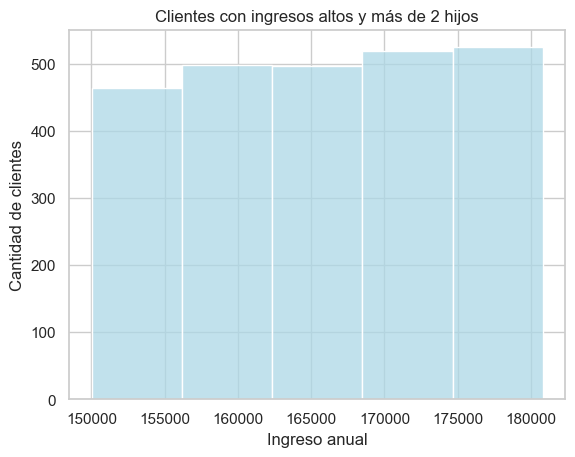

In [101]:
sns.histplot(clientes_ingresos_altos_hijos["Income"], bins=5, color="lightblue")
plt.title("Clientes con ingresos altos y más de 2 hijos")
plt.xlabel("Ingreso anual")
plt.ylabel("Cantidad de clientes")
plt.show()

Se observa una ligera tendencia de como aquellos clientes con ingresos más altos, tienen un número mayor de hijos (en este caso más de dos hijos)

In [38]:
prom_duracion_por_visitas = bnk_add_cust_det_merge.groupby("NumWebVisitsMonth")["duration"].mean() # promedio de la duración de las llamadas agrupado por nº de veces que llama cada cliente
print(prom_duracion_por_visitas)

NumWebVisitsMonth
1     258.148318
2     261.092199
3     244.139403
4     261.203540
5     248.264906
6     250.382286
7     258.265466
8     260.053707
9     251.381203
10    263.311439
11    262.183988
12    256.515108
13    274.029499
14    260.448736
15    246.778924
16    265.803101
17    257.048265
18    257.248244
19    263.485007
20    262.627941
21    263.505789
22    261.913269
23    248.498171
24    263.470323
25    256.604634
26    267.131148
27    255.697126
28    254.639381
29    259.965967
30    240.249622
31    254.877713
32    259.201848
Name: duration, dtype: float64


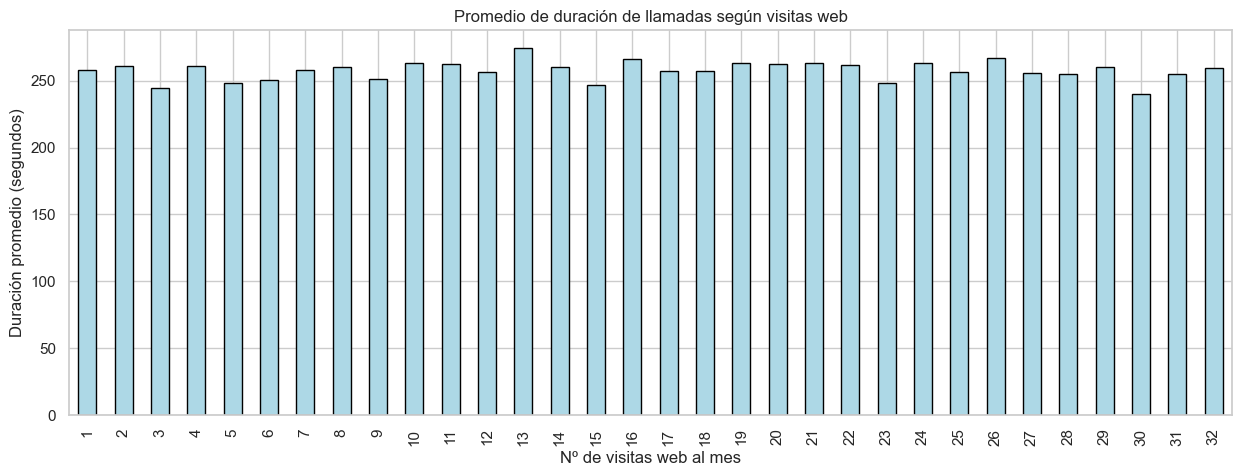

In [79]:
plt.figure(figsize=(15,5))
prom_duracion_por_visitas.plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Promedio de duración de llamadas según visitas web")
plt.xlabel("Nº de visitas web al mes")
plt.ylabel("Duración promedio (segundos)")
plt.show()

No observamos ninguna anomalía en el promedio de llamadas por visitas a la página web

In [ ]:
edad_por_educacion = bnk_add_cust_det_merge.groupby("education")["age"].describe() # estadística de la edad por nivel educativo
edad_por_educacion

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
basic.4y,4356.0,46.460514,11.921001,18.0,38.0,45.0,54.0,98.0
basic.6y,2386.0,40.115675,8.158032,18.0,35.0,38.0,45.0,95.0
basic.9y,6309.0,38.973371,9.036068,17.0,33.0,38.0,45.0,94.0
high.school,9925.0,37.920302,9.081963,18.0,31.0,38.0,43.0,88.0
illiterate,18.0,46.388889,11.230939,34.0,38.0,44.5,51.0,80.0
professional.course,5477.0,39.760635,9.294598,20.0,33.0,38.0,45.0,86.0
university.degree,12722.0,38.747210,9.061291,20.0,32.0,38.0,44.0,91.0
unknown,1807.0,42.615938,11.806193,17.0,36.0,41.0,50.0,92.0


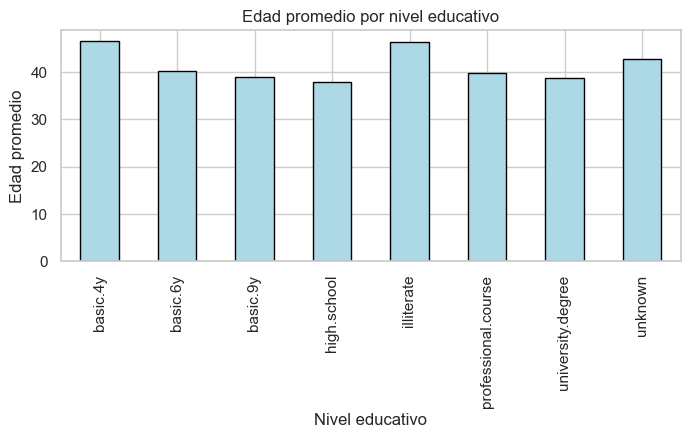

In [67]:
edad_por_educacion = bnk_add_cust_det_merge.groupby("education")["age"].mean()
plt.figure(figsize=(8,3))
edad_por_educacion.plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Edad promedio por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Edad promedio")
plt.show()

Se observa como los clientes de mayor edad tienen un nivel educativo más bajo que el resto (nivel básico de 4 años o analfabetos), lo cual tiene sentido ya que antes era más díficil acceder a un nivel educativo más alto como un grado universitario o un grado de formación profesional

In [ ]:
duracion_por_ingreso = bnk_add_cust_det_merge.groupby(bnk_add_cust_det_merge["Income"])["duration"].mean() # promedio de la duración de las llamadas por ingresos
print(duracion_por_ingreso)  # en este caso habría que acotar un rango de ingresos porque si no obtenemos un output muy extenso

Income
5841      252.000000
5848      310.000000
5852      180.000000
5858      305.000000
5867      316.000000
             ...    
180780    248.666667
180786    274.000000
180787    203.333333
180791    886.000000
180802    251.000000
Name: duration, Length: 38173, dtype: float64


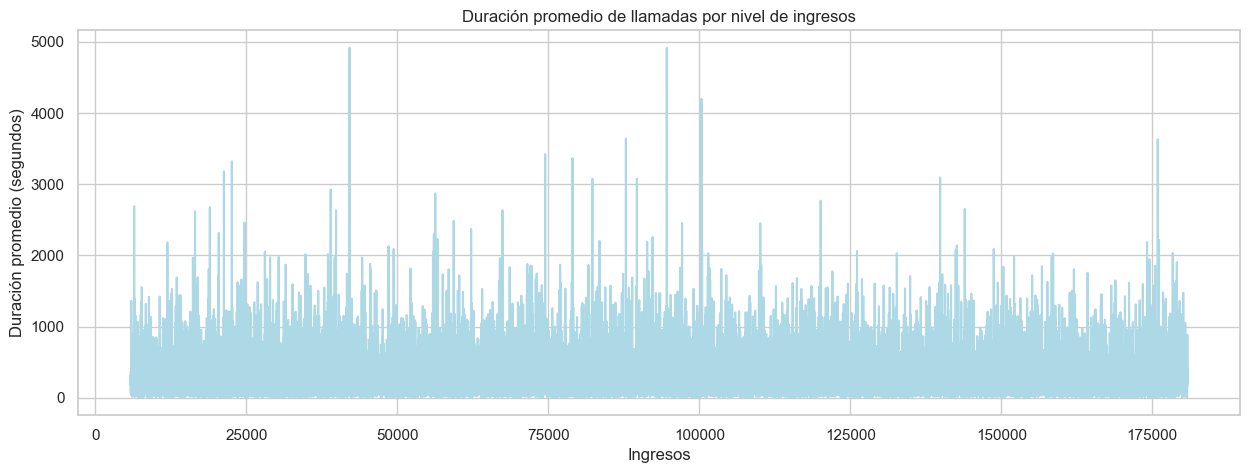

In [77]:
duracion_por_ingreso = bnk_add_cust_det_merge.groupby("Income")["duration"].mean()
plt.figure(figsize=(15,5))
duracion_por_ingreso.plot(kind="line", color="lightblue")
plt.title("Duración promedio de llamadas por nivel de ingresos")
plt.xlabel("Ingresos")
plt.ylabel("Duración promedio (segundos)")
plt.show()

Destacan algunos picos de llamadas que superan los 3.000 segundos (50 minutos), pero no se observa ninguna correlación con los ingresos anuales, pues estos picos se extienden a lo largo de la gráfica indistintamente

In [ ]:
clientes_riesgo_ext = bnk_add_cust_det_merge.query("age > 50 & loan == 1 & housing == 1 & TotalHijos > 2") # parecido a una que teníamos antes pero en este caso busca clientes en riesgo extremo, pues incluye también un nº de hijos superior a dos.
print(clientes_riesgo_ext.shape)

(204, 34)


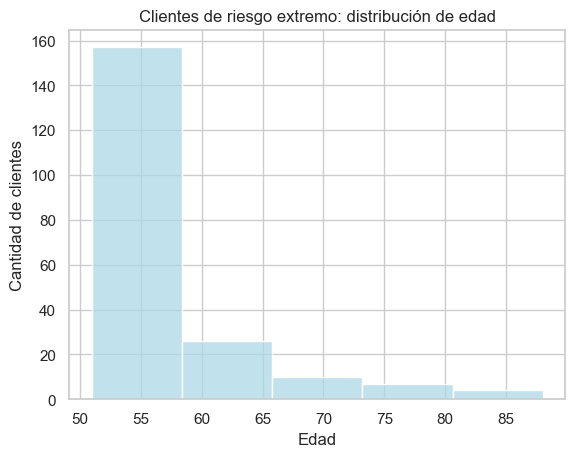

In [97]:
sns.histplot(clientes_riesgo_ext["age"], bins=5, color="lightblue")
plt.title("Clientes de riesgo extremo: distribución de edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad de clientes")
plt.show()

La gran mayoría de clientes en riesgo extremo (mayores de 50 años, con más de dos hijos y varios préstamos) se sitúan enter los 50 y los 58 años. Además esta cifra va disminuyendo conforme mayores son los clientes.

### CSV con el resultado final del DataFrame 'bnk_add_cust_det_merge' (bank-additional + customer-details)

In [108]:
bnk_add_cust_det_merge.to_csv("bnk_add_cust_det_merge.csv", index=False) 

### Excel con el resultado final del DataFrame 'bnk_add_cust_det_merge' (bank-additional + customer-details)

In [109]:
bnk_add_cust_det_merge.to_excel("bnk_add_cust_det_merge.xlsx", index=False)